### Gate Comparison
For some brief motivation of the oscillator-qubit approach, we highlight Sec. V.E of the paper [arXiv:2409.03747](https://arxiv.org/abs/2409.03747) and compare the number of entangling gates required to implement the hopping term in (1+1)D between two sites, in terms of the bosonic Hilbert space cutoff, for hybrid oscillator-qubit architechture and the all-qubit architechture.

- **Hybrid Oscillator-Qubit Model**: This uses a single conditional beam splitter (CBs) defined as 
  $\text{CBs}_{i,j,k}(\phi, \theta) = C_{\Pi_{i,j}} \, \text{Bs}_{j,k}(\phi + \pi/2, \theta) \, C_{\Pi_{i,j}}^\dagger,$
  which is a beam splitter sandwiched between two conditional parity operations. The gate count for this model is constant at 
  $N_\text{hybrid} = 2,$
  with complexity 
  $\mathcal{O}(1).$

- **All-Qubit Model**: This uses Fock binary encoding, where the CNOT count is given by 
  $N_\text{qubit} = 12(2673n^2 + 1160n - 34),$
  with 
  $n = \log_2(N_\text{max} + 1),$
  and \(N_\text{max}\) is the Hilbert space cutoff. The complexity scales as 
  $\mathcal{O}(n^2) = \mathcal{O}(\log(N_\text{max})^2).$

Below, we plot the entangling gate count as a function of the single-site Hilbert space cutoff and the circuit fidelity as a function of entangling gate fidelity for a fixed $N_\text{max} = 2$.

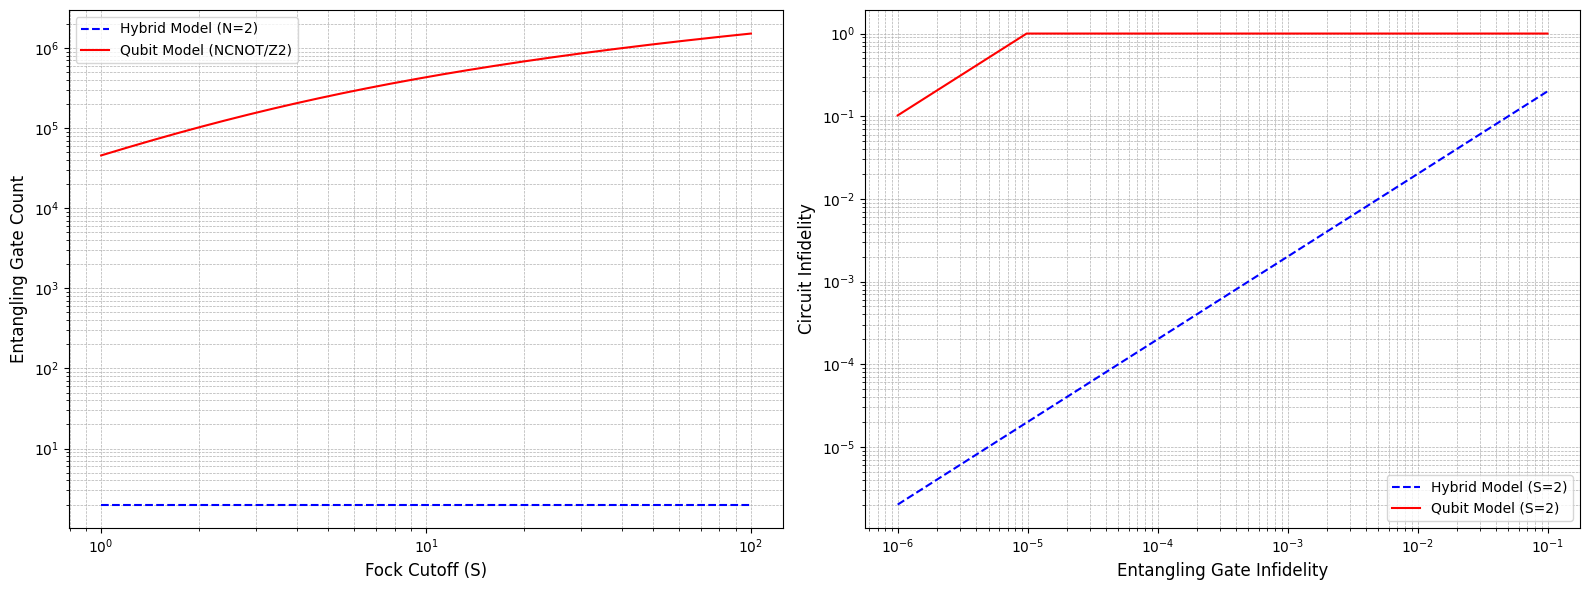

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Fock cutoff range on a log scale
fock_cutoff = np.logspace(0, 2, 500) 

# Define the models
S = fock_cutoff  # Fock cutoff
n = np.log2(S + 1)  

# Hybrid model: constant at N=2
hybrid_gate_count = np.full_like(S, 2)

# Qubit model: N = 12(2673n^2 + 1160n − 34)
qubit_gate_count = 12 * (2673 * n**2 + 1160 * n - 34)

gate_infidelity = np.logspace(-6, -1, 500)

# For S = 2, calculate the number of gates for both models
S_fixed = 2
n_fixed = np.log2(S_fixed + 1)

# Hybrid model: constant gate count at N = 2
hybrid_gate_count_fixed = 2
hybrid_circuit_infidelity = hybrid_gate_count_fixed * gate_infidelity

# Qubit model: N = 12(2673n^2 + 1160n − 34) for fixed S
qubit_gate_count_fixed = 12 * (2673 * n_fixed**2 + 1160 * n_fixed - 34)
qubit_circuit_infidelity = qubit_gate_count_fixed * gate_infidelity

# Cap the circuit infidelity at 1
hybrid_circuit_infidelity_capped = np.minimum(hybrid_circuit_infidelity, 1)
qubit_circuit_infidelity_capped = np.minimum(qubit_circuit_infidelity, 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(S, hybrid_gate_count, label="Hybrid Model (N=2)", color='blue', linestyle='--')
axs[0].plot(S, qubit_gate_count, label="Qubit Model (NCNOT/Z2)", color='red')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel("Fock Cutoff (S)", fontsize=12)
axs[0].set_ylabel("Entangling Gate Count", fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True, which="both", linestyle='--', linewidth=0.5)

axs[1].plot(gate_infidelity, hybrid_circuit_infidelity_capped, label="Hybrid Model (S=2)", color='blue', linestyle='--')
axs[1].plot(gate_infidelity, qubit_circuit_infidelity_capped, label="Qubit Model (S=2)", color='red')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel("Entangling Gate Infidelity", fontsize=12)
axs[1].set_ylabel("Circuit Infidelity", fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and display
plt.tight_layout()
plt.show()